# Sample code of adjacency matrix and adjacency list in graph with networkx
## Install the necessary python libraries

In [2]:
!pip install networkx pandas numpy matplotlib scipy
import networkx as nx
import numpy as np

## Initialize graph with example nodes and edges.

In [3]:
G = nx.Graph()

G.add_node("Seoul")
G.add_node("Paris")
G.add_node("London")
G.add_node("New York")
G.add_node("Hanoi")
G.add_node("Tokyo")

G.add_weighted_edges_from(
    [
        ("Seoul", "New York", 11052),
        ("Seoul", "Tokyo", 1159),
        ("Hanoi", "Seoul", 2740),
        ("Paris", "Tokyo", 9712),
        ("Paris", "New York", 5834),
        ("Hanoi", "New York", 13142),
        ("Tokyo", "London", 9559),
        ("Tokyo", "Hanoi", 3661),
        ("Paris", "London", 487)
    ]
)

## Drawing the Graph with networkx.

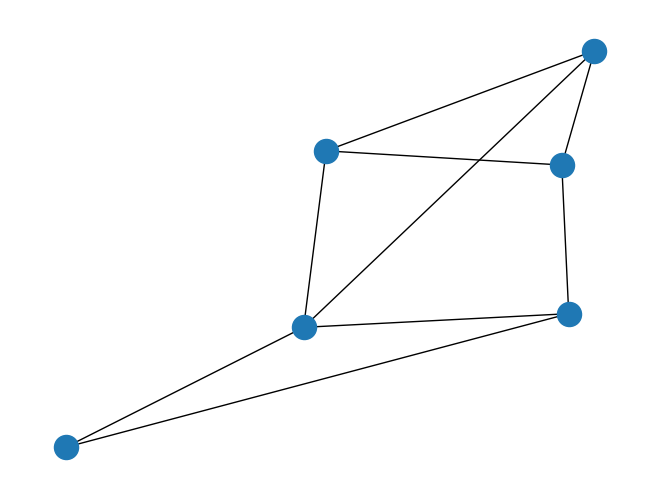

In [4]:
nx.draw(G)

## Draw graph with node labels

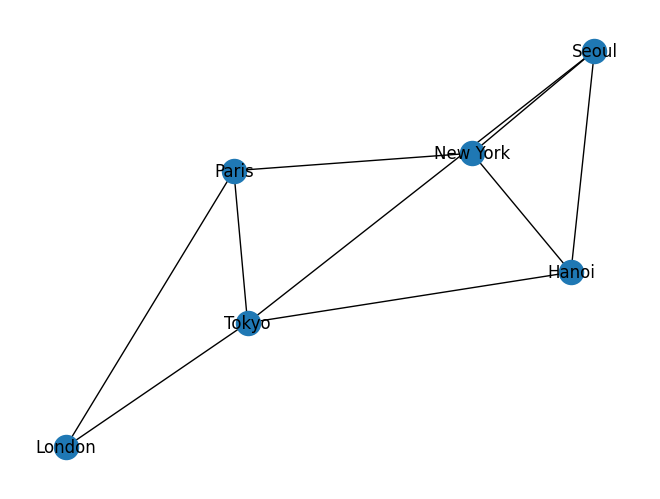

In [5]:
nx.draw(G, with_labels = True)

## Using layout to draw graph
### Spring layout

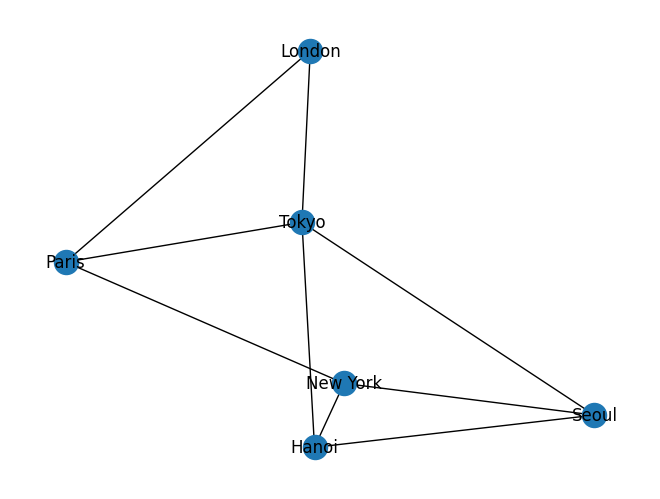

In [6]:
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels = True)

### Circular layout

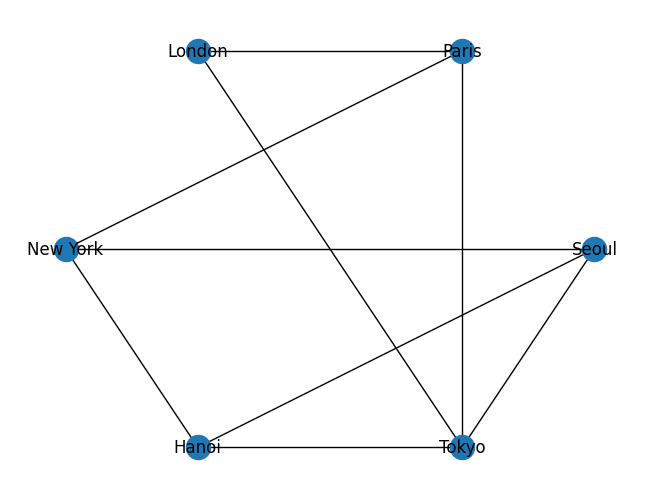

In [7]:
# set circular layout
pos = nx.circular_layout(G)

# draw graph
nx.draw(G, pos, with_labels = True)

### Tree Layout

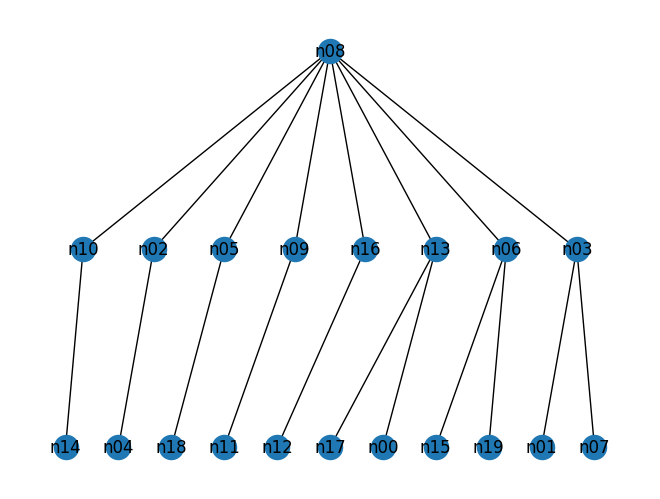

In [9]:
def partition(number):
    answer = set()
    answer.add((number, )) 
    for x in range(1, number):# binary partition: increase x and partition y 
        for y in partition(number - x):# new partition of x 
            answer.add(tuple(sorted((x, ) + y)))
    return answer

def list_partition(input_lst, split_size):
    if sum(split_size)==len(input_lst):
        r_lst = [input_lst[sum(split_size[:i-1]):sum(split_size[:i])] for i in range(1, len(split_size)+1)]
        return r_lst
    else:
        print('sum(split_size)!=len(input_lst)')
        return None

def make_random_tree(G, node_set, level=3):
    level_node_size = [1 for i in range(1, level)]
    for i in range(0, len(node_set)-level):
        level_node_size[np.random.randint(0, len(level_node_size))]+=1
    level_node_size = sorted(level_node_size)
    G.add_node('l0_n1', level=0)
    
    for each_level, children_size in enumerate(level_node_size):
        each_level = each_level + 1
        parent_node_set = [n[0] for n in G.nodes(data=True) if n[1]['level'] == each_level-1]
        children_node_set = [('l{}_n{}'.format(each_level, i), {'level':each_level}) for i in range(0, children_size)]
        G.add_nodes_from(children_node_set)

        children_ps = [p for p in partition(len(children_node_set)) if len(p)==len(parent_node_set)]
        children_ps = children_ps[np.random.randint(0, len(children_ps))]
        children_ps = list_partition(children_node_set, children_ps)
        
        edges = []
        for j, parent_node in enumerate(parent_node_set):
            for c in children_ps[j]:
                edges.append((parent_node, c[0]))
        
        G.add_edges_from(edges)
            
    ## Relabel 
    new_node_label = np.random.choice(node_set, len(node_set), replace=False)
    return nx.relabel_nodes(G, {n: new_n for n, new_n in zip(G.nodes(), new_node_label)})


def tree_position(graph):
    pos_dict = {}
    levels = {n[1]['level'] for n in graph.nodes(data=True)}
    for i, l in enumerate(range(min(levels), max(levels)+1)):
        nodes = [n for n in graph.nodes(data=True) if n[1]['level']==l]
        y = 1.0 - (1.0/(len(levels)+1)*(i+1))
        pos_dict.update({n[0]:(1.0/(len(nodes)+1)*(j+1), y) for j, n in enumerate(nodes)})
    return pos_dict

g = nx.Graph()
g = make_random_tree(g, ["n{:0>2d}".format(i) for i in range(0, 20)], level=3)
positions = tree_position(g)
nx.draw(g, positions, with_labels = True)

### Draw edges with labels

{('Seoul',
  'New York'): Text(1.4901160971803051e-08, -1.9206817775722963e-08, '3 flights daily'),
 ('Paris',
  'London'): Text(-2.9802321943606103e-08, 0.8660254296429223, '5 flights daily'),
 ('New York',
  'Paris'): Text(-0.24999999627470976, 0.4330126982635194, '2 flights daily')}

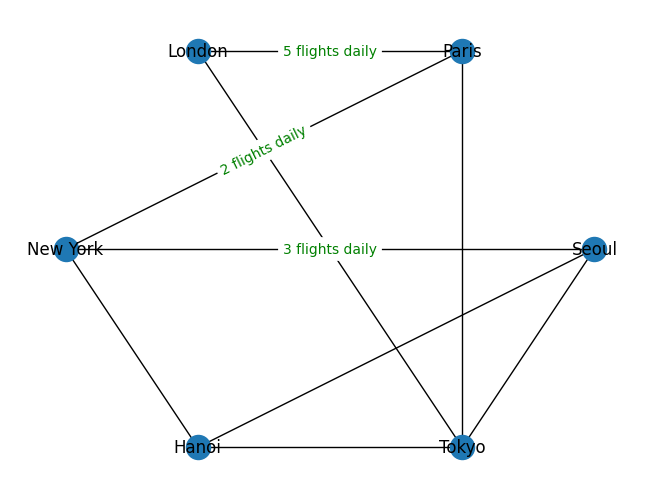

In [10]:
# draw edge labels
edge_labels = {
        ("Seoul","New York"): '3 flights daily', 
        ("Paris","London"): '5 flights daily',
        ("New York","Paris"): '2 flights daily',
    }
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='green'
)

### Custom graph style

{('Seoul',
  'New York'): Text(1.4901160971803051e-08, -1.9206817775722963e-08, '3 flights daily'),
 ('Paris',
  'London'): Text(-2.9802321943606103e-08, 0.8660254296429223, '5 flights daily'),
 ('New York',
  'Paris'): Text(-0.24999999627470976, 0.4330126982635194, '2 flights daily')}

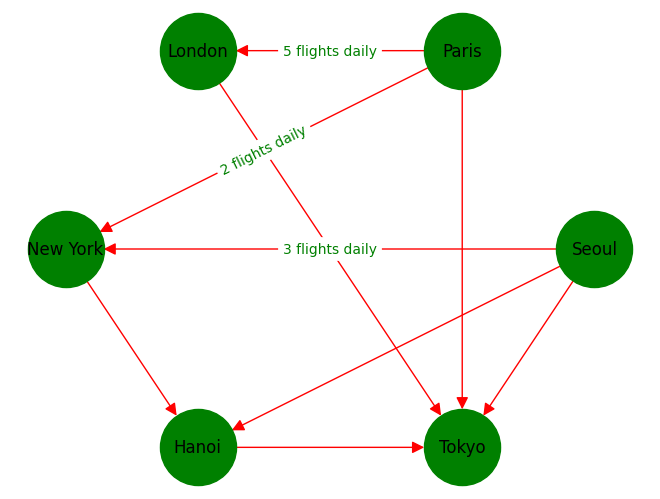

In [11]:
options = {
    'node_color': 'green',      # color of node
    'node_size': 3000,          # size of node
    'width': 1,                 # line width of edges
    'arrowstyle': '-|>',        # array style for directed graph
    'arrowsize': 18,            # size of arrow
    'edge_color':'red',         # edge color
}

nx.draw(G, pos, with_labels = True, arrows=True, **options)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='green'
)

### Custom graph style

{('Seoul',
  'New York'): Text(1.4901160971803051e-08, -1.9206817775722963e-08, '3 flights daily'),
 ('Paris',
  'London'): Text(-2.9802321943606103e-08, 0.8660254296429223, '5 flights daily'),
 ('New York',
  'Paris'): Text(-0.24999999627470976, 0.4330126982635194, '2 flights daily')}

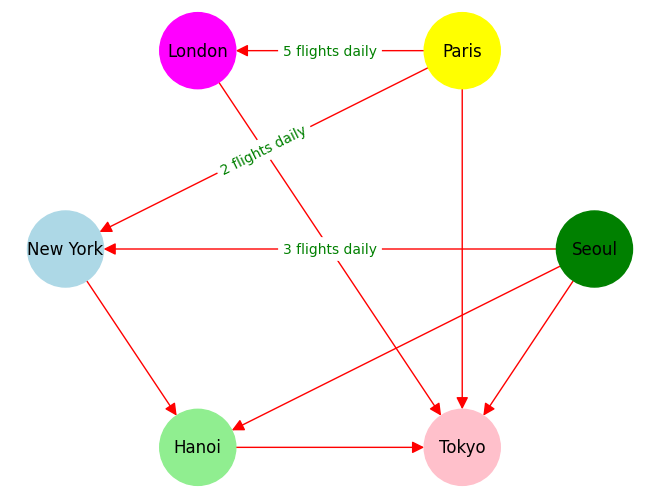

In [12]:
colors = ['green', 'yellow', 'magenta', 'lightblue', 'lightgreen', 'pink']
options = {
    'node_color': colors,      # color of node
    'node_size': 3000,          # size of node
    'width': 1,                 # line width of edges
    'arrowstyle': '-|>',        # array style for directed graph
    'arrowsize': 18,            # size of arrow
    'edge_color':'red',         # edge color
}

nx.draw(G, pos, with_labels = True, arrows=True, **options)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='green'
)

### Use weight to make edge labels

{('Seoul',
  'New York'): Text(1.4901160971803051e-08, -1.9206817775722963e-08, '11052'),
 ('Seoul', 'Tokyo'): Text(0.7499999590218074, -0.43301269296576733, '1159'),
 ('Seoul', 'Hanoi'): Text(0.25000005587935364, -0.43301269296576733, '2740'),
 ('Paris', 'Tokyo'): Text(0.4999999478459366, 2.4504569873240456e-08, '9712'),
 ('Paris', 'New York'): Text(-0.24999999627470976, 0.4330126982635194, '5834'),
 ('Paris', 'London'): Text(-2.9802321943606103e-08, 0.8660254296429223, '487'),
 ('London',
  'Tokyo'): Text(-5.9604643887212205e-08, -5.297752070365647e-09, '9559'),
 ('New York',
  'Hanoi'): Text(-0.7499999292194854, -0.43301273667715495, '13142'),
 ('Hanoi', 'Tokyo'): Text(1.4901160971803051e-08, -0.8660254104361045, '3661')}

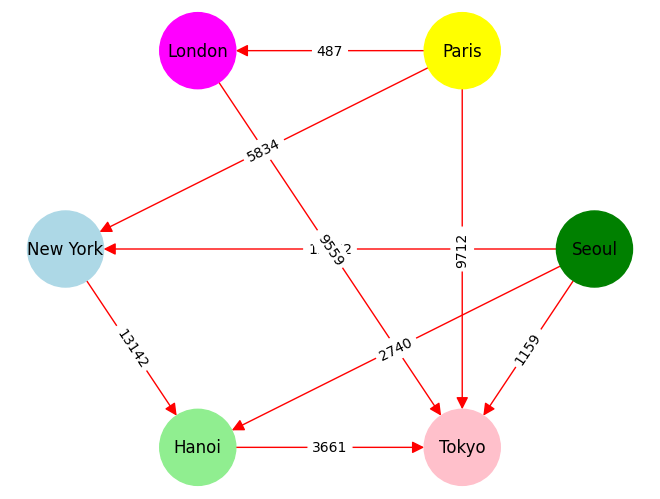

In [15]:
colors = ['green', 'yellow', 'magenta', 'lightblue', 'lightgreen', 'pink']
options = {
    'node_color': colors,       # color of node
    'node_size': 3000,          # size of node
    'width': 1,                 # line width of edges
    'arrowstyle': '-|>',        # array style for directed graph
    'arrowsize': 18,            # size of arrow
    'edge_color':'red',         # edge color
}

nx.draw(G, pos, with_labels = True, arrows=True, **options)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

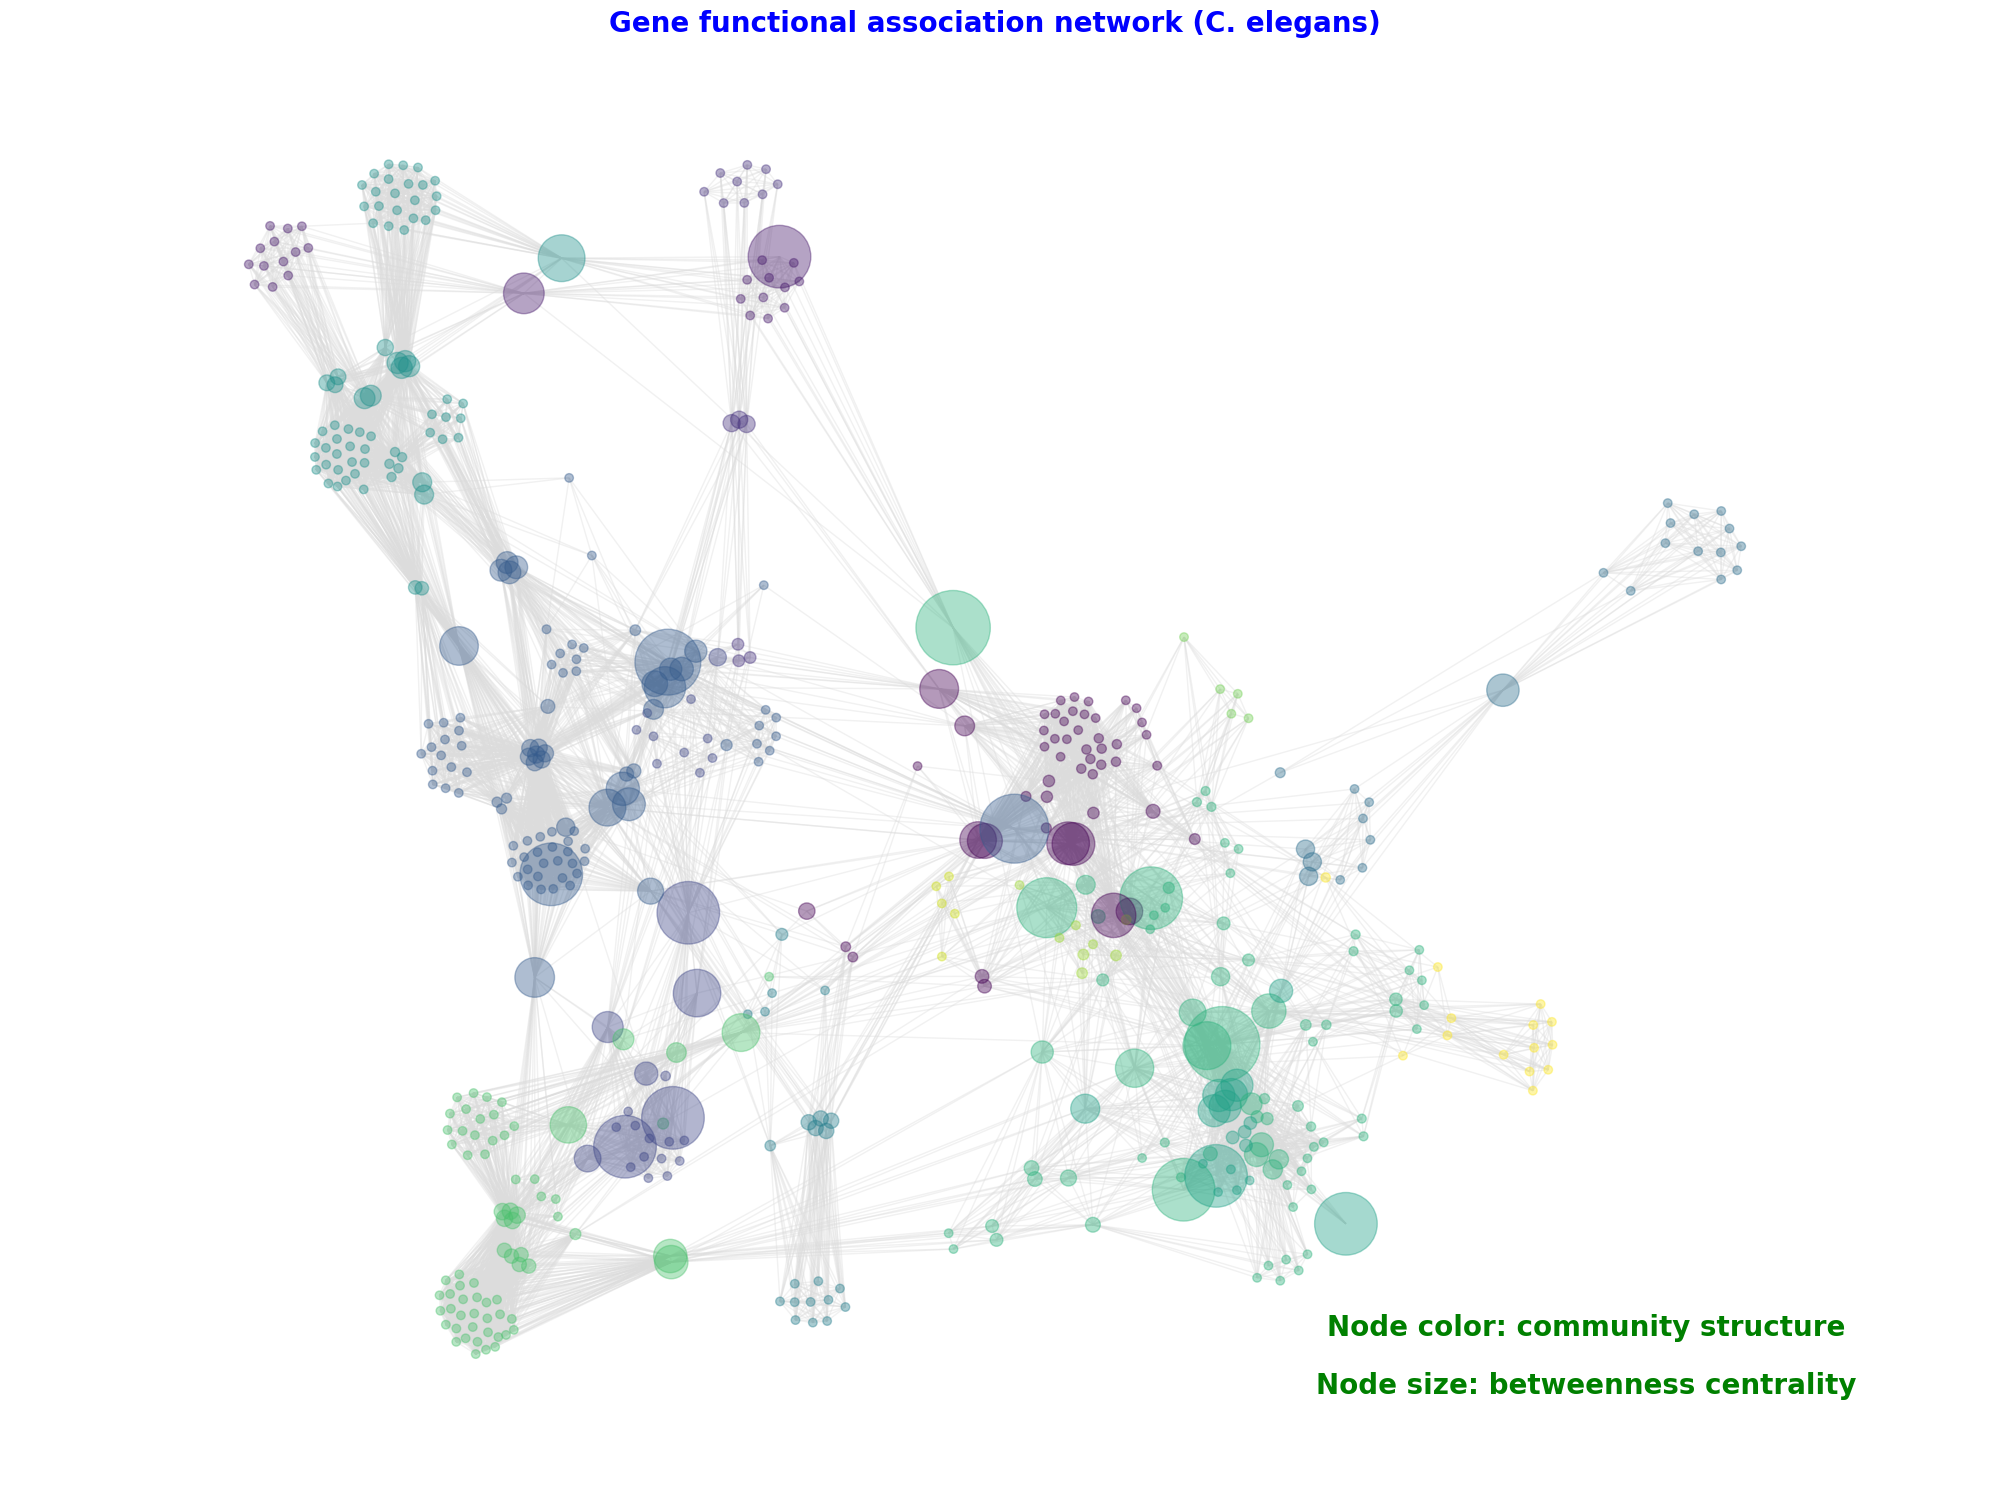

In [31]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Read graph data from edgelist
G = nx.read_edgelist("data/WormNet.v3.benchmark.txt")

# Remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# Remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# Get largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# Calculate betweenness centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# Compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

# Draw graph using matplotlib
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "green"

ax.text(
    0.80,
    0.10,
    "Node color: community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "Node size: betweenness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()